# QHyper

opisac z ktorego wzoru korzystalismy - unbalanced penalization

In [1]:
hyper_params = {'cost_function_weight': 1, # weight for: cost function
               'deadline_linear_form_weight': 2, # weight for: deadline constraint - linear form (-- this is from the unbalanced penalization approach)
                'deadline_quadratic_form_weight': 2} # weight for: deadline constraint - quadratic form
tasks_file =  "workflows_data/workflows/3_tasks_4_machines_1_path.json"
machines_file = "workflows_data/machines/machines_for_3_tasks_4_machines_1_path.json"
deadline = 13


In [2]:
import numpy as np
params_config = {
        'angles': [[1.9482, 4.2254, 4.1086, 5.7801, 4.1416, 3.8738],
                   [0.9043, 2.5178, 1.7931, 2.4655, 1.3755, 1.0457]], # QAOA angles - first we have gammas (for the cost Hamiltonian), then we have betas (for the mixer)
        'hyper_args': [hyper_params['cost_function_weight'],
                       hyper_params['deadline_linear_form_weight'],
                       hyper_params['deadline_quadratic_form_weight']
                       ],
    }


In [3]:
from QHyper.solvers import VQA, solver_from_config

solver_config = {
    "solver": {
        "type": "vqa",
        "pqc": {
            "type": "qml_qaoa",
            "layers": 6,
            "optimizer": "qng",
            "optimizer_args": {
                "stepsize": 0.00045,
                "steps": 50,
                "verbose": True,
            },
            "backend": "default.qubit",
        },
        "params_inits": params_config
    },
    "problem": {
        "type": "workflow_scheduling",
        "encoding": "binary",
        "tasks_file": tasks_file,
        "machines_file": machines_file,
        "deadline": deadline,
    }
}

vqa = solver_from_config(solver_config)


In [4]:
solver_results = vqa.solve()


Step 1/50: 395.1869821406802
Step 2/50: 306.0307396542468
Step 3/50: 273.516893666911
Step 4/50: 260.59405657349856
Step 5/50: 254.23033677722174
Step 6/50: 250.4092605457856
Step 7/50: 247.71784774086015
Step 8/50: 245.5733611996601
Step 9/50: 243.70799684044817
Step 10/50: 241.99267922031174
Step 11/50: 240.36469553751607
Step 12/50: 238.79426110970306
Step 13/50: 237.2682276921241
Step 14/50: 235.7818761093793
Step 15/50: 234.33460263789866
Step 16/50: 232.92750583163303
Step 17/50: 231.56193222983867
Step 18/50: 230.23854994315752
Step 19/50: 228.95676592924283
Step 20/50: 227.714417301782
Step 21/50: 226.5077121697547
Step 22/50: 225.3314033012392
Step 23/50: 224.17916719642398
Step 24/50: 223.04414451784245
Step 25/50: 221.91958339019075
Step 26/50: 220.7995188945179
Step 27/50: 219.67942078233082
Step 28/50: 218.55674566918606
Step 29/50: 217.43133804809992
Step 30/50: 216.30563553514494
Step 31/50: 215.1846481413903
Step 32/50: 214.07569997914555
Step 33/50: 212.98794503910952


In [5]:
print(f"Best params: {solver_results.params}")


Best params: {'angles': tensor([[1.94824404, 4.22606355, 4.10783934, 5.78004543, 4.14199089,
         3.87371591],
        [0.87116674, 2.61620323, 1.70712985, 2.43543308, 1.26776386,
         0.88477619]], requires_grad=True), 'hyper_args': tensor([1, 2, 2], requires_grad=True)}


In [6]:
from QHyper.util import (
    weighted_avg_evaluation, sort_solver_results, add_evaluation_to_results)

# Evaluate results with weighted average evaluation
print("Evaluation:")
print(weighted_avg_evaluation(
    solver_results.probabilities, vqa.problem.get_score,
    penalty=0, limit_results=20, normalize=True
))
print("Sort results:")
sorted_results = sort_solver_results(
    solver_results.probabilities, limit_results=20)

# Add evaluation to results
results_with_evaluation = add_evaluation_to_results(
    sorted_results, vqa.problem.get_score, penalty=0)

for result, (probability, evaluation) in results_with_evaluation.items():
    print(f"Result: {result}, "
          f"Prob: {probability:.5}, "
          f"Evaluation: {evaluation}")


Evaluation:
16.09368696345939
Sort results:
Result: 000001, Prob: 0.23369, Evaluation: 25.0
Result: 000101, Prob: 0.043394, Evaluation: 26.0
Result: 101001, Prob: 0.037332, Evaluation: 28.0
Result: 011010, Prob: 0.037254, Evaluation: 28.0
Result: 111101, Prob: 0.036207, Evaluation: 0
Result: 100101, Prob: 0.03569, Evaluation: 28.0
Result: 101101, Prob: 0.028978, Evaluation: 0
Result: 011101, Prob: 0.027494, Evaluation: 0
Result: 110001, Prob: 0.026161, Evaluation: 0
Result: 000010, Prob: 0.02585, Evaluation: 0
Result: 010101, Prob: 0.025357, Evaluation: 28.0
Result: 111001, Prob: 0.023499, Evaluation: 0
Result: 100001, Prob: 0.023403, Evaluation: 27.0
Result: 010001, Prob: 0.022452, Evaluation: 27.0
Result: 010100, Prob: 0.022427, Evaluation: 0
Result: 010111, Prob: 0.022149, Evaluation: 0
Result: 011110, Prob: 0.020162, Evaluation: 0
Result: 001010, Prob: 0.019498, Evaluation: 0
Result: 101010, Prob: 0.017514, Evaluation: 0
Result: 010000, Prob: 0.017514, Evaluation: 0


<Axes: xlabel='index', ylabel='value'>

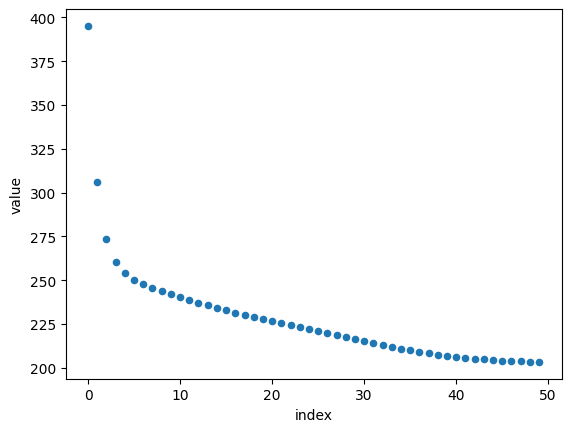

In [7]:
import pandas as pd

pd.DataFrame(solver_results.history[0]).reset_index().plot(x='index',y='value', kind='scatter')


In [8]:
solver_config = {
    "solver": {
        "type": "cqm",
        "time": 13,
        "params_inits": params_config
    },
    "problem": {
        "type": "workflow_scheduling",
        "encoding": "one-hot",
        "tasks_file": tasks_file,
        "machines_file": machines_file,
        "deadline": deadline,
    }
}

cqm = solver_from_config(solver_config)


In [9]:
cqm.solve()


TypeError: 'Expression' object is not iterable